In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.9 MB/s eta 0:00:00


In [ ]:
import json
from bertopic import BERTopic
import numpy as np


# BERTOPIC MODULARIZADO

Com o modelo "paraphrase-multilingual-MiniLM-L12-v2" para embeddings

In [ ]:
with open('/content/profiles_data_3.json', 'r', encoding='utf-8') as file:
    docs = json.load(file)

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from umap import UMAP
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer

def bertopic_model(docs, stop_words=None,
                           n_neighbors=15, n_components=5,
                           min_dist=0.0, hdbscan_min_cluster_size=15):
    """
    Create and fit a BERTopic model.

    Parameters:
    - docs: List of documents to be processed.
    - stop_words: List of stop words to be removed. Default is None.
    - n_neighbors: Number of neighbors to consider for UMAP. Default is 15.
    - n_components: Number of components for UMAP. Default is 5.
    - min_dist: Minimum distance for UMAP. Default is 0.0.
    - hdbscan_min_cluster_size: Minimum cluster size for HDBSCAN. Default is 15.

    Returns:
    - topics: Topic assignments for each document.
    - probs: Probability of each document belonging to its assigned topic.
    - topic_model: The fitted BERTopic model.
    """

    # Step 1 - Extract embeddings
    embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

    # Step 2 - Reduce dimensionality
    umap_model = UMAP(n_neighbors=n_neighbors, n_components=n_components, min_dist=min_dist, metric='cosine')

    # Step 3 - Cluster reduced embeddings
    hdbscan_model = HDBSCAN(min_cluster_size=hdbscan_min_cluster_size,
                            metric='euclidean',
                            cluster_selection_method='eom',
                            prediction_data=True)

    # Step 4 - Tokenize topics
    vectorizer_model = CountVectorizer(stop_words=stop_words)

    # Step 5 - Create topic representation
    ctfidf_model = ClassTfidfTransformer()

    # Step 6 - Fine-tune topic representations with a `bertopic.representation` model
    representation_model = KeyBERTInspired()

    # All steps together
    model = BERTopic(
        embedding_model=embedding_model,          # Step 1 - Extract embeddings
        umap_model=umap_model,                    # Step 2 - Reduce dimensionality
        hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
        vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
        ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
        representation_model=representation_model  # Step 6 - Fine-tune topic representations
    )

    # Fit the model
    topics, probs = model.fit_transform(docs)

    return topics, probs, model

In [ ]:
topics, probs, topic_model = bertopic_model(docs)

In [ ]:
import joblib

# Salvar o modelo BERTopic
topic_model.save("model")

# Salvar os tópicos e probabilidades
joblib.dump((topics, probs), "/content/topics_probs.pkl")

In [ ]:
# Carregar o modelo BERTopic
topic_model = BERTopic.load("model")

In [ ]:
info_topics = topic_model.get_topic_info()
info_topics

,Topic,Count,Name,Representation,Representative_Docs
0,-1,5373,-1_estupro_aborto_feminismo_feminista,"[estupro, aborto, feminismo, feminista, violên...",[repostr haver dilema ético mulher feministo...
1,0,657,0_mãe_nascer_existir_bom,"[mãe, nascer, existir, bom, amor, maternidad, ...",[ouvir falar nao romantizar maternidad achar m...
2,1,365,1_olímpico_olimpíada_paralímpico_medalhista,"[olímpico, olimpíada, paralímpico, medalhista,...",[igualdad celebrar atleta homem mulher chegar ...
3,2,211,2_masculinidadetóxica_masculinidad_masculinida...,"[masculinidadetóxica, masculinidad, masculinid...",[homem algum homem sentir ciumento inseguro am...
4,3,199,3_violenciadegenero_violência_violento_violentar,"[violenciadegenero, violência, violento, viole...",[merec provocar bater empurrar frase comum fal...
...,...,...,...,...,...
89,88,17,88_socialgostar_psicológicosão_psicologico_social,"[socialgostar, psicológicosão, psicologico, so...",[atencao hoje indicar voce trabalho trabal...
90,89,16,89_relaxar_divertir_wandinha_tomar,"[relaxar, divertir, wandinha, tomar, festa, ra...",[volta pó festa ano deixar gostinho ser apro...
91,90,16,90_viral_coronavíru_ajudar_controlar,"[viral, coronavíru, ajudar, controlar, viavir,...","[ajudar trabalho seguir viral viral, ajuda..."
92,91,15,91_prevençãoquaternária_medicinabaseadaemevide...,"[prevençãoquaternária, medicinabaseadaemeviden...",[ouvir falar prevenção quaternário conceito ...


In [ ]:
topic_model.visualize_topics()

## Avaliação

### Coerência

In [ ]:
# Tokenização dos documentos
tokenized_docs = [doc.split() for doc in docs]
tokenized_docs

NameError: name 'docs' is not defined

In [ ]:
from gensim.models import Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=1, workers=4)

Avaliação da Coerência Dentro de um Tópico

In [ ]:
import numpy as np

def coherence_within_topic(topic_id, model, word2vec_model):
    # Obtendo palavras do tópico
    words = topic_model.get_topic(topic_id)
    words = [word for word, _ in words]

    # Calculando a similaridade média
    similarities = []
    for i in range(len(words)):
        for j in range(i + 1, len(words)):
            try:
                sim = word2vec_model.wv.similarity(words[i], words[j])
                similarities.append(sim)
            except KeyError:
                continue

    return np.mean(similarities) if similarities else 0.0

# Avaliando a coerência dentro de cada tópico
for topic in set(topics):
    coherence = coherence_within_topic(topic, topic_model, word2vec_model)
    print(f"Tópico {topic}: Coerência dentro do tópico = {coherence:.4f}")


Tópico 0: Coerência dentro do tópico = 0.8603
Tópico 1: Coerência dentro do tópico = 0.8964
Tópico 2: Coerência dentro do tópico = 0.9761
Tópico 3: Coerência dentro do tópico = 0.9773
Tópico 4: Coerência dentro do tópico = 0.9222
Tópico 5: Coerência dentro do tópico = 0.9053
Tópico 6: Coerência dentro do tópico = 0.8312
Tópico 7: Coerência dentro do tópico = 0.9297
Tópico 8: Coerência dentro do tópico = 0.9609
Tópico 9: Coerência dentro do tópico = 0.5840
Tópico 10: Coerência dentro do tópico = 0.9422
Tópico 11: Coerência dentro do tópico = 0.8985
Tópico 12: Coerência dentro do tópico = 0.8738
Tópico 13: Coerência dentro do tópico = 0.8311
Tópico 14: Coerência dentro do tópico = 0.9471
Tópico 15: Coerência dentro do tópico = 0.7548
Tópico 16: Coerência dentro do tópico = 0.8595
Tópico 17: Coerência dentro do tópico = 0.9105
Tópico 18: Coerência dentro do tópico = 0.8946
Tópico 19: Coerência dentro do tópico = 0.9265
Tópico 20: Coerência dentro do tópico = 0.9569
Tópico 21: Coerência de

In [ ]:
topic_model.get_topics()

{-1: [('violência', 0.51118773),
  ('vítima', 0.5095607),
  ('crime', 0.45939356),
  ('gênero', 0.43841028),
  ('feminismo', 0.41803595),
  ('feminista', 0.4110546),
  ('sociedade', 0.40825927),
  ('feminino', 0.39306423),
  ('existir', 0.39195985),
  ('história', 0.39159957)],
 0: [('abortolegal', 0.60640085),
  ('abortoseguro', 0.58429515),
  ('abortar', 0.5715173),
  ('aborto', 0.5647148),
  ('descriminalização', 0.44892558),
  ('gravidez', 0.44627103),
  ('gestação', 0.43269712),
  ('legalização', 0.40372807),
  ('proibir', 0.40347755),
  ('permitir', 0.39431328)],
 1: [('mães', 0.5022701),
  ('mãe', 0.4935393),
  ('paternidade', 0.48467654),
  ('entender', 0.46194905),
  ('nascer', 0.45174867),
  ('existir', 0.44372866),
  ('criança', 0.44022727),
  ('maternidade', 0.43647814),
  ('falar', 0.4280358),
  ('sentir', 0.4230923)],
 2: [('olímpico', 0.58646595),
  ('olimpíada', 0.5593601),
  ('paralímpico', 0.54072183),
  ('campeonato', 0.51423407),
  ('competição', 0.5070985),
  ('esp

## Visualização e *Análise*

In [ ]:
topic_model.get_representative_docs(-1)

['repostr   haver dilema ético mulher feministo apoiar legalização aborto mulher ser feminista acordo pesquisa nacion aborto 2016 1 5 mulher 40 ano haver fazer aborto estimas 950 12 milhão aborto ser fazer ano brasil 2008 2017 21 milhão mulher internar rede público complicação   ser 75 aborto provocar   gerar despesa r 486 milhão su dado subnotificar sabes 4455 mulher morrer 2000 2016 mulher negro 25 chanc morrer durant aborto mulher brancassobreviv aborto privilégio raça class mulher parar abortar legalização mort mulherescito livro feminismo mundo bell hook capítulo política feministo estamoso feminismo estilo vida introduzir ideia poder haver tanto versão feminismo quanta ser mulher existent repent política começar pouco removida feminismo prevalec hipótes importar posicionamento político mulher ser conservador liber encaixar feminismo estilo vida obviament maneira pensar feminismo aceitável pressuposto subjacent mulher feministo fundamentalment desafiar mudar se mesmo cultura vejam

In [ ]:
topic_model.visualize_distribution(probabilities=probs)


NameError: name 'probs' is not defined

In [ ]:
topic_model.get_topics(0)

{-1: [('estupro', 0.49549094),
  ('aborto', 0.4374835),
  ('feminismo', 0.41593173),
  ('feminista', 0.39149815),
  ('violência', 0.37424523),
  ('afirmar', 0.37177813),
  ('gênero', 0.3591662),
  ('menina', 0.35532463),
  ('legal', 0.34858048),
  ('crime', 0.34693244)],
 0: [('mãe', 0.4415518),
  ('nascer', 0.42789954),
  ('existir', 0.42533714),
  ('bom', 0.42256084),
  ('amor', 0.4201904),
  ('maternidad', 0.41504565),
  ('falar', 0.4031176),
  ('querer', 0.40275747),
  ('sentir', 0.4013151),
  ('criança', 0.3975158)],
 1: [('olímpico', 0.60207295),
  ('olimpíada', 0.5761143),
  ('paralímpico', 0.54871297),
  ('medalhista', 0.5210568),
  ('esportivo', 0.5065162),
  ('competição', 0.50435674),
  ('medalha', 0.5010735),
  ('campeonato', 0.49878842),
  ('esport', 0.47824827),
  ('atletismo', 0.4755127)],
 2: [('masculinidadetóxica', 0.70963234),
  ('masculinidad', 0.6862613),
  ('masculinidades', 0.67558634),
  ('misoginia', 0.64085776),
  ('feminismosemdemagogia', 0.6215465),
  ('patr

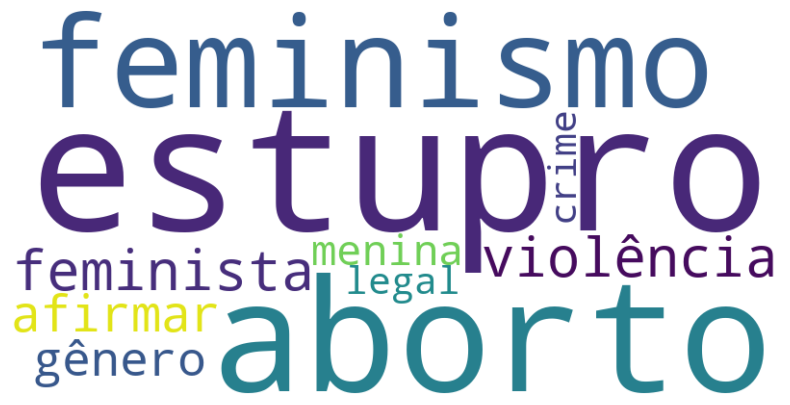

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Função para criar nuvem de palavras
def plot_wordcloud(topic_id):
    words = topic_model.get_topic(topic_id)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Exemplo para o tópico 0
plot_wordcloud(-1)


In [ ]:
import plotly.express as px
import pandas as pd

# Obter informações dos tópicos
topic_info = topic_model.get_topic_info()

# Criar um gráfico de barras
fig = px.bar(topic_info, x='Topic', y='Count', title='Distribuição dos Tópicos')
fig.show()


In [ ]:
fig = topic_model.visualize_barchart(top_n_topics=93)
fig.show()

In [ ]:
fig = topic_model.visualize_hierarchy()
fig.show()

## Analisando o tópico de outliers

In [ ]:
df_docs = topic_model.get_document_info(docs)
outliers_docs = df_docs[df_docs['Topic'] == -1]
outliers_docs = outliers_docs['Document'].tolist()
len(outliers_docs)

5373

In [ ]:
topics, probs, topic_model_outliers = bertopic_model(outliers_docs, stop_words)

In [ ]:
topic_model_outliers.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2745,-1_aborto_estupro_brasileiro_brasil,"[aborto, estupro, brasileiro, brasil, feminism...",[caso isolar entend direito criança adolesce...
1,0,632,0_via_passar_vc_ir,"[via, passar, vc, ir, tbt, seri, davi, achar, ...","[via, vontad diavia, sextafeira ótimo oportuni..."
2,1,372,1_brasileiro_brasil_brasileira_mundo,"[brasileiro, brasil, brasileira, mundo, cultur...",[muito gent diferent paí brasil paí conquistar...
3,2,205,2_sentimento_sensação_pensar_aproveitar,"[sentimento, sensação, pensar, aproveitar, exi...",[amor deixeiprir sonheinão verjá tar minhao ve...
4,3,137,3_feministo_feminismo_feminista_misoginia,"[feministo, feminismo, feminista, misoginia, f...",[falo dar criação feminista ben pessoa nao ent...
5,4,97,4_afirmar_ministro_político_deputado,"[afirmar, ministro, político, deputado, justiç...",[haver ano vereadora ativist político mariel f...
6,5,69,5_futebol_brasileiro_brasil_divulgar,"[futebol, brasileiro, brasil, divulgar, afirma...",[juiz rodrigo azevedo costa lotar vara família...
7,6,67,6_saúd_debat_contracepção_discussão,"[saúd, debat, contracepção, discussão, consult...",[2019 coletivo dedicar produzir reflexão ferra...
8,7,65,7_mulheresnapolitico_feministo_feminismos_femi...,"[mulheresnapolitico, feministo, feminismos, fe...",[lançamento curso perfeito pra mulherr entend ...
9,8,62,8_mulher_feminino_atriz_interpretar,"[mulher, feminino, atriz, interpretar, protago...",[exercício troca papel mostrar sexismo present...


In [ ]:
import plotly.express as px
import pandas as pd

# Obter informações dos tópicos
topic_info = topic_model_outliers.get_topic_info()

# Criar um gráfico de barras
fig = px.bar(topic_info, x='Topic', y='Count', title='Distribuição dos Tópicos')
fig.show()


In [ ]:
fig = topic_model_outliers.visualize_barchart(top_n_topics=93)
fig.show()

## Pegar as legendas originais que representam cada tópico escolhido

In [ ]:
topic_model.get_representative_docs(-1)


['repostr   haver dilema ético mulher feministo apoiar legalização aborto mulher ser feminista acordo pesquisa nacion aborto 2016 1 5 mulher 40 ano haver fazer aborto estimas 950 12 milhão aborto ser fazer ano brasil 2008 2017 21 milhão mulher internar rede público complicação   ser 75 aborto provocar   gerar despesa r 486 milhão su dado subnotificar sabes 4455 mulher morrer 2000 2016 mulher negro 25 chanc morrer durant aborto mulher brancassobreviv aborto privilégio raça class mulher parar abortar legalização mort mulherescito livro feminismo mundo bell hook capítulo política feministo estamoso feminismo estilo vida introduzir ideia poder haver tanto versão feminismo quanta ser mulher existent repent política começar pouco removida feminismo prevalec hipótes importar posicionamento político mulher ser conservador liber encaixar feminismo estilo vida obviament maneira pensar feminismo aceitável pressuposto subjacent mulher feministo fundamentalment desafiar mudar se mesmo cultura vejam

In [ ]:
!pip install jsonlines

In [ ]:
import json

# Lista para armazenar os dados combinados de todos os arquivos
combined_data = []

# Lista com os nomes/endereços dos 6 arquivos JSON
json_files = [
    "/content/2024_09_22_coletivo_feminista.json",  # Substitua pelos caminhos reais dos seus arquivos
    "/content/2024_09_22_feminiismo.json",
    "/content/2024_09_22_feminismo_semdemagogia.json",
    "/content/2024_09_22_planetaella.json",
    "/content/2024_09_26_arquivosfeministas.json",
    "/content/2024_09_26_revistatpm.json"
]

# Carregar e combinar os dados de cada arquivo
for file in json_files:
    with open(file, "r") as f:
        try:
            data = json.load(f)  # Carrega os dados do arquivo JSON
            combined_data.append(data)  # Adiciona os dados ao conjunto combinado
        except json.JSONDecodeError as e:
            print(f"Erro ao carregar {file}: {e}")  # Exibe erro se o arquivo estiver corrompido

# Agora, combined_data contém todos os dados combinados dos 6 arquivos
print(f"Carregamos {len(combined_data)} registros de todos os arquivos com sucesso.")


Carregamos 6 registros de todos os arquivos com sucesso.


In [ ]:
import json

# Lista para armazenar os títulos
all_titles = []

# Iterar sobre cada conjunto de dados (um por arquivo JSON carregado)
for data_set in combined_data:
    # Dentro de cada conjunto, temos os resultados no campo 'result'
    results = data_set.get('result', [])

    # Para cada post nos resultados, extrair o título
    for post in results:
        # Verificamos se o campo 'title' existe no post antes de tentar acessá-lo
        if 'title' in post:
            all_titles.append(post['title'])

# Exibir a quantidade total de títulos extraídos e os primeiros para verificar
print(f"Foram extraídos {len(all_titles)} títulos.")
print(all_titles[:10])  # Exibe os primeiros 10 títulos para verificação


Foram extraídos 11582 títulos.
['💥📢🌿 Está chegando! Salvem a data!\n\nA Frente pela Legalização do Ab0rt0 SP e seus coletivos convocam para o grande ato no Dia da Luta pela Descriminalização das Mulheres e Legalização do Ab0rt0 na America Latina e Caribe, 28 de setembro, às 15h, em frente ao MASP (av. Paulista)\n🌿 contra os retrocessos, perseguições e restrição dos direitos reprodutivos impostos pelos governos municipais, federais e conselhos de classe \n🌿 por justiça reprodutiva\n🌿 pela reabertura e ampliação dos serviços de ab0rtament0 legal, seguro e gratuito\n🌿 pela garantia dos direitos e da vida de crianças, mulheres e pessoas que gestam\n\n🌿💥Venha com seu lenço verde que vamos ocupar as ruas por nossos direitos!!!\n📍Onde: Masp / av. Paulista / São Paulo-SP\n⏰️Quando: 28 de setembro de 2024 / 15h', 'Nos juntamos entre várias organizações para criar uma trilha de aprendizagem acessível e gratuita: "Como dialogar sobre o aborto na política?"\n\nO material oferece um panorama abrang

In [ ]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

processed_data = topic_model.get_representative_docs(16)
# Concatenando os dados processados com os títulos originais
combined_texts = processed_data + all_titles

# Criar um vetor TF-IDF sobre todos os textos combinados
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(combined_texts)

# Separar as matrizes TF-IDF dos textos processados e dos títulos
processed_tfidf = tfidf_matrix[:len(processed_data)]
titles_tfidf = tfidf_matrix[len(processed_data):]

# Calcular a similaridade de cosseno entre os textos processados e os títulos
similarity_matrix = cosine_similarity(processed_tfidf, titles_tfidf)

# Exibir a matriz de similaridade
print(f"Matriz de Similaridade (dimensões: {similarity_matrix.shape}):")
print(similarity_matrix)

# Exemplo de exibição da maior similaridade para cada texto processado
for i, similarities in enumerate(similarity_matrix):
    # Encontrar o índice do título mais similar para cada texto processado
    most_similar_title_index = similarities.argmax()
    print(f"Texto processado {i+1} é mais similar ao título: '{all_titles[most_similar_title_index]}' com similaridade: {similarities[most_similar_title_index]:.4f}")


Matriz de Similaridade (dimensões: (3, 11582)):
[[0.00369772 0.00437681 0.0262557  ... 0.04428071 0.00332244 0.00675604]
 [0.         0.00940287 0.03108474 ... 0.00972315 0.         0.01135877]
 [0.00397041 0.00254194 0.02655171 ... 0.03105542 0.         0.00209932]]
Texto processado 1 é mais similar ao título: 'Você já parou pra pensar sobre os efeitos do estigma em torno da saúde mental para as pessoas que vivem com alguma forma de sofrimento psíquico? Isto se reflete, por exemplo, na vivência dos sujeitos que foram por muitos anos institucionalizados em grandes manicômios e, ao saírem, encontraram dificuldades para serem reinseridos na sociedade "do lado de fora". 
 
Mas é bom dizer que o estigma em saúde mental não acompanha apenas sujeitos com transtornos mentais graves e com longo histórico de tratamento ou fortes marcas de seu transtorno. Pessoas com outras formas e questões psíquicas muitas vezes deixam de procurar ajuda profissional por medo de serem tomadas como "loucas" em r

## Json estruturado para a entrada da llm

In [ ]:
topic_info=
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,5373,-1_estupro_aborto_feminismo_feminista,"[estupro, aborto, feminismo, feminista, violên...",[repostr haver dilema ético mulher feministo...
1,0,657,0_mãe_nascer_existir_bom,"[mãe, nascer, existir, bom, amor, maternidad, ...",[ouvir falar nao romantizar maternidad achar m...
2,1,365,1_olímpico_olimpíada_paralímpico_medalhista,"[olímpico, olimpíada, paralímpico, medalhista,...",[igualdad celebrar atleta homem mulher chegar ...
3,2,211,2_masculinidadetóxica_masculinidad_masculinida...,"[masculinidadetóxica, masculinidad, masculinid...",[homem algum homem sentir ciumento inseguro am...
4,3,199,3_violenciadegenero_violência_violento_violentar,"[violenciadegenero, violência, violento, viole...",[merec provocar bater empurrar frase comum fal...
...,...,...,...,...,...
89,88,17,88_socialgostar_psicológicosão_psicologico_social,"[socialgostar, psicológicosão, psicologico, so...",[atencao hoje indicar voce trabalho trabal...
90,89,16,89_relaxar_divertir_wandinha_tomar,"[relaxar, divertir, wandinha, tomar, festa, ra...",[volta pó festa ano deixar gostinho ser apro...
91,90,16,90_viral_coronavíru_ajudar_controlar,"[viral, coronavíru, ajudar, controlar, viavir,...","[ajudar trabalho seguir viral viral, ajuda..."
92,91,15,91_prevençãoquaternária_medicinabaseadaemevide...,"[prevençãoquaternária, medicinabaseadaemeviden...",[ouvir falar prevenção quaternário conceito ...


In [ ]:
import pandas as pd
import json

data = topic_model.get_topic_info()

df = pd.DataFrame(data)

# Llista de dicionários para gerar o JSON
topic_json = []
for index, row in df.iterrows():
    topic_dict = {
        "palavras-chave": row['Representation'],
        "texto": row['Representative_Docs'][0]  # Pega o primeiro documento representativo
    }
    topic_json.append(topic_dict)

# Converter para JSON
json_output = json.dumps(topic_json, ensure_ascii=False, indent=4)

# Exibir ou salvar o JSON gerado
print(json_output)

# Caso deseje salvar em um arquivo JSON:
with open("topicos_llm_input.json", "w", encoding='utf-8') as f:
    f.write(json_output)


[
    {
        "palavras-chave": [
            "estupro",
            "aborto",
            "feminismo",
            "feminista",
            "violência",
            "afirmar",
            "gênero",
            "menina",
            "legal",
            "crime"
        ],
        "texto": "repostr   haver dilema ético mulher feministo apoiar legalização aborto mulher ser feminista acordo pesquisa nacion aborto 2016 1 5 mulher 40 ano haver fazer aborto estimas 950 12 milhão aborto ser fazer ano brasil 2008 2017 21 milhão mulher internar rede público complicação   ser 75 aborto provocar   gerar despesa r 486 milhão su dado subnotificar sabes 4455 mulher morrer 2000 2016 mulher negro 25 chanc morrer durant aborto mulher brancassobreviv aborto privilégio raça class mulher parar abortar legalização mort mulherescito livro feminismo mundo bell hook capítulo política feministo estamoso feminismo estilo vida introduzir ideia poder haver tanto versão feminismo quanta ser mulher existent repen